In [8]:
import pandas as pd
import warnings
import io
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [2]:
from google.colab import files


uploaded = files.upload()

Saving Bitcoin Data.csv to Bitcoin Data.csv


##**TỔNG QUAN DATASET BITCOIN PRICE 2021/2023**##



Text(0.5, 0, 'Date (2021/06 - 2023/06)')

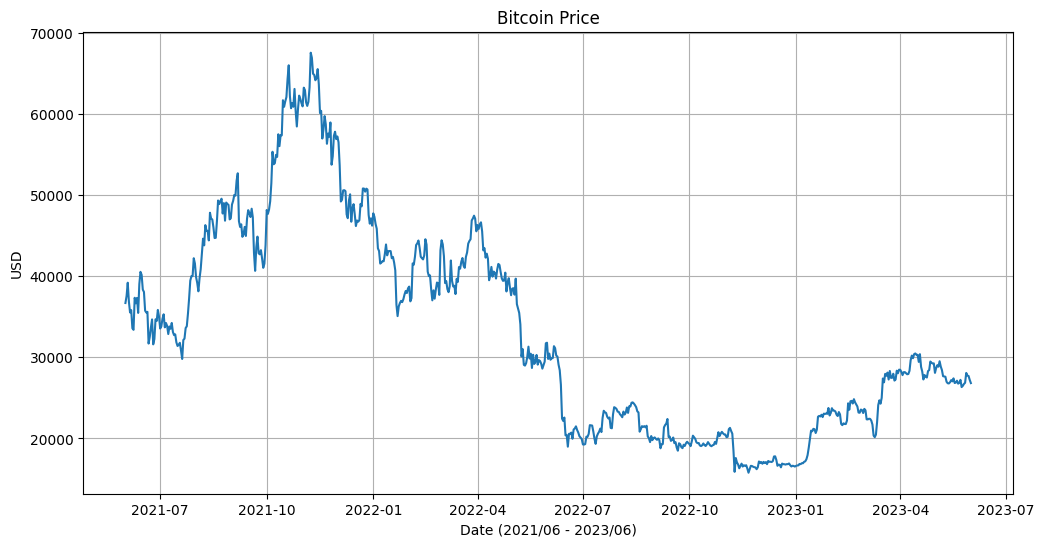

In [4]:
data = pd.read_csv(io.BytesIO(uploaded['Bitcoin Data.csv']))

# Chuyển cột 'Date' sang kiểu dữ liệu ngày tháng
data['Date'] = pd.to_datetime(data['Date'])
data721 = data
data622 = data
data811 = data

# Tạo cột 'Month' để lưu giá trị tháng
data['Month'] = data['Date'].dt.month


# Chọn cột giá Bitcoin (giả sử là cột 'Price') và cột tháng (giả sử là cột 'Month')
x = data['Date']
y = data['Close']

# Vẽ đồ thị
plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.grid(True)

# Đặt tiêu đề và nhãn trục
plt.title('Bitcoin Price')
plt.ylabel('USD')
plt.xlabel('Date (2021/06 - 2023/06)')

# Hiển thị đồ thị
#plt.show()

## based models comparisons 7-2-1 split


In [6]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = data721[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [9]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [10]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

In [11]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[9647.43896404 9588.89294828 9530.34693252 9471.80091676 9413.254901
 9354.70888524 9296.16286948 9237.61685372 9179.07083796 9120.5248222
 9061.97880644 9003.43279068 8944.88677492 8886.34075916 8827.7947434
 8769.24872764 8710.70271188 8652.15669612 8593.61068036 8535.0646646
 8476.51864884 8417.97263308 8359.42661732 8300.88060156 8242.3345858
 8183.78857004 8125.24255428 8066.69653852 8008.15052276 7949.604507  ]


In [12]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 16286.765097722733
Testing RMSE: 5451.537364474981


Validation RMSE: 16286.765097722733
Testing RMSE: 5451.537364474981


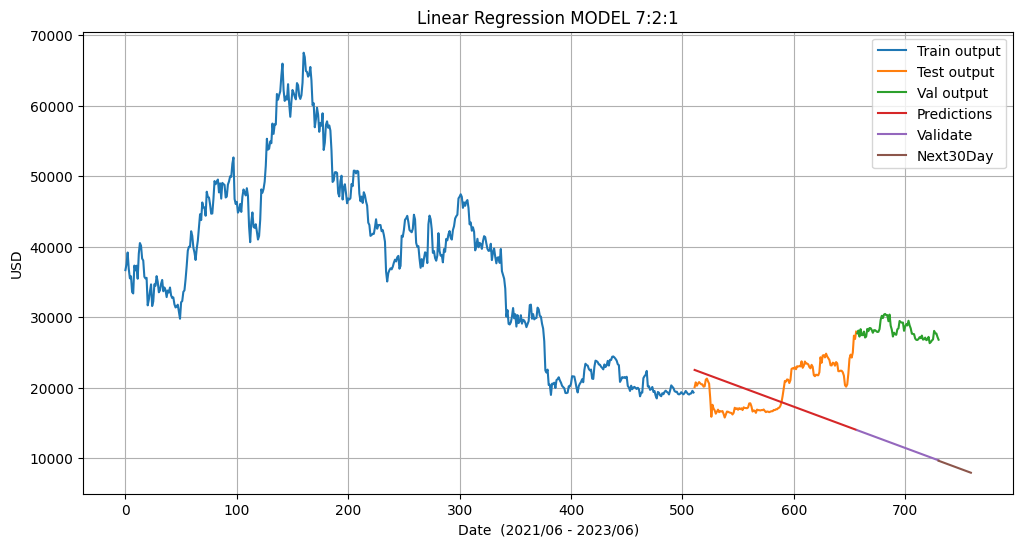

In [17]:
# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output','Val output', 'Predictions','Validate','Next30Day'])
plt.title('Linear Regression MODEL 7:2:1')
plt.xlabel('Date  (2021/06 - 2023/06)')
plt.ylabel('USD')
plt.show()

In [23]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(val_data, y_pred_val)
mape = mean_absolute_percentage_error(val_data, y_pred_val)
mse = mean_squared_error(val_data, y_pred_val)
rmse = np.sqrt(mse)
print('-VALID-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 4669.83
MAPE: 22.35%
MSE: 29719259.64
RMSE: 5451.54
-VALID-
MAE: 16235.72
MAPE: 57.83%
MSE: 265258717.35
RMSE: 16286.77


## based models comparisons 6-2-2 split


Predicted closing prices for the next 30 days:
[16560.54224303 16514.01125919 16467.48027535 16420.94929151
 16374.41830767 16327.88732383 16281.35633999 16234.82535615
 16188.29437231 16141.76338847 16095.23240462 16048.70142078
 16002.17043694 15955.6394531  15909.10846926 15862.57748542
 15816.04650158 15769.51551774 15722.9845339  15676.45355006
 15629.92256622 15583.39158238 15536.86059854 15490.3296147
 15443.79863086 15397.26764702 15350.73666318 15304.20567934
 15257.6746955  15211.14371166]
Validation RMSE: 7295.315069427902
Testing RMSE: 8054.651811536249
Validation RMSE: 7295.315069427902
Testing RMSE: 8054.651811536249


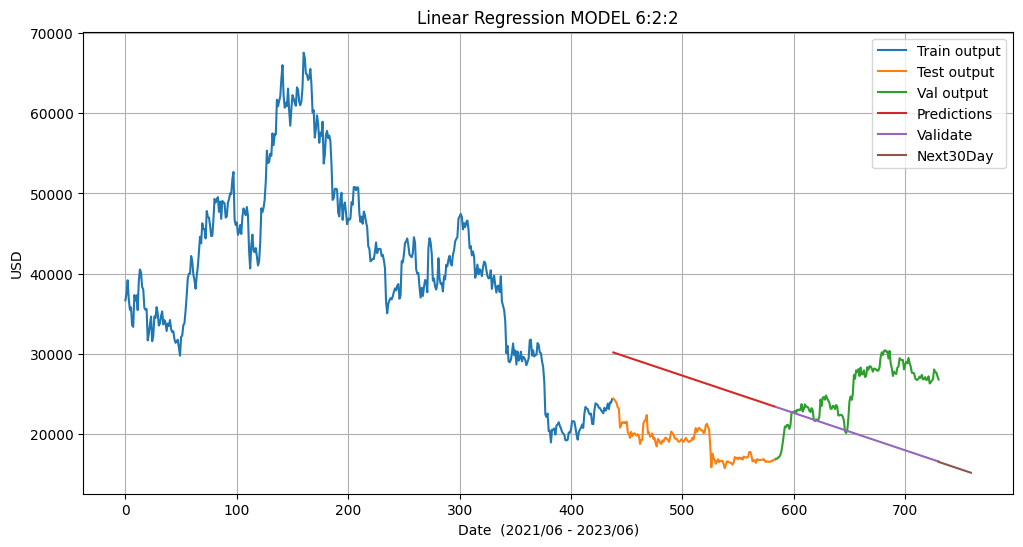

In [27]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = data622[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.6 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output','Val output', 'Predictions','Validate','Next30Day'])
plt.title('Linear Regression MODEL 6:2:2')
plt.xlabel('Date  (2021/06 - 2023/06)')
plt.ylabel('USD')
plt.show()

In [28]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(val_data, y_pred_val)
mape = mean_absolute_percentage_error(val_data, y_pred_val)
mse = mean_squared_error(val_data, y_pred_val)
rmse = np.sqrt(mse)
print('-VALID-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 7970.82
MAPE: 42.91%
MSE: 64877415.81
RMSE: 8054.65
-VALID-
MAE: 6046.49
MAPE: 22.65%
MSE: 53221621.96
RMSE: 7295.32


## based models comparisons 8-1-1 split


Predicted closing prices for the next 30 days:
[7873.43367662 7811.67083227 7749.90798792 7688.14514357 7626.38229923
 7564.61945488 7502.85661053 7441.09376619 7379.33092184 7317.56807749
 7255.80523315 7194.0423888  7132.27954445 7070.5167001  7008.75385576
 6946.99101141 6885.22816706 6823.46532272 6761.70247837 6699.93963402
 6638.17678968 6576.41394533 6514.65110098 6452.88825663 6391.12541229
 6329.36256794 6267.59972359 6205.83687925 6144.0740349  6082.31119055]
Validation RMSE: 17938.779392230936
Testing RMSE: 8363.755298555963
Validation RMSE: 17938.779392230936
Testing RMSE: 8363.755298555963


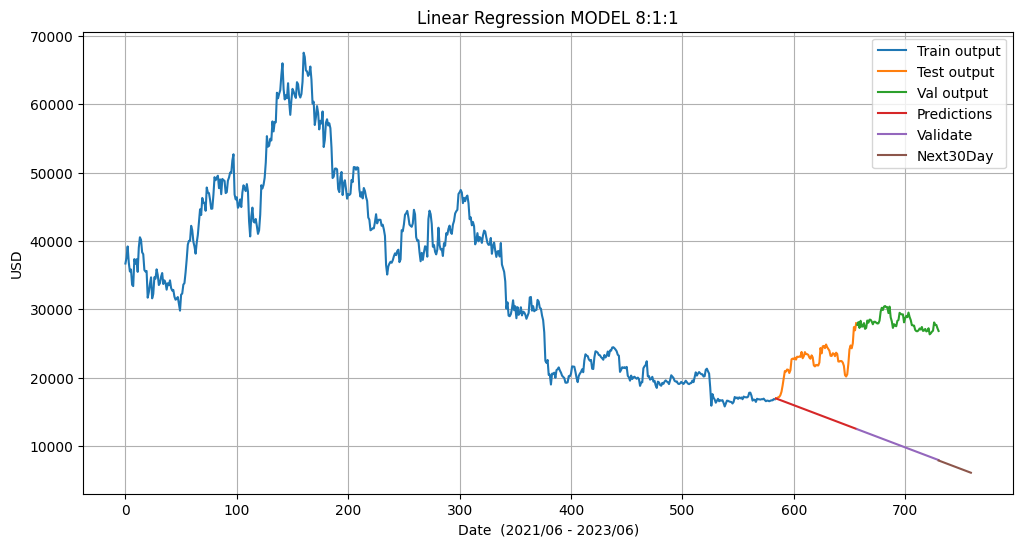

In [30]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
df = data622[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(x_test)

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(x_val)

# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 8. Tính RMSE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

# 9.Vẽ hình
plt.figure(figsize=(12, 6))
plt.grid(True)
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(val_data.index, val_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train output', 'Test output','Val output', 'Predictions','Validate','Next30Day'])
plt.title('Linear Regression MODEL 8:1:1')
plt.xlabel('Date  (2021/06 - 2023/06)')
plt.ylabel('USD')
plt.show()

In [31]:
mae = mean_absolute_error(test_data, y_pred)
mape = mean_absolute_percentage_error(test_data, y_pred)
mse = mean_squared_error(test_data, y_pred)
rmse = np.sqrt(mse)
print('-TEST-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

mae = mean_absolute_error(val_data, y_pred_val)
mape = mean_absolute_percentage_error(val_data, y_pred_val)
mse = mean_squared_error(val_data, y_pred_val)
rmse = np.sqrt(mse)
print('-VALID-')
print(f"MAE: {mae:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

-TEST-
MAE: 7736.10
MAPE: 33.35%
MSE: 69952402.69
RMSE: 8363.76
-VALID-
MAE: 17889.09
MAPE: 63.73%
MSE: 321799806.08
RMSE: 17938.78
